### K-Means Clustering

K-Means is an unsupervised machine learning algorithm used to group data into K clusters based on similarity.
* It groups data points such that:
* Points within the same cluster are similar
* Points in different clusters are dissimilar

K-Means works by:
* Choosing K cluster centers (called centroids)
* Assigning each data point to the nearest centroid
* Updating centroids based on assigned points
*Repeating until clusters become stable

Used in:
* Customer segmentation
* Image compression
* Product recommendation
* Grouping similar data points

### Concept of Clustering (Unsupervised Learning)

Clustering is an unsupervised learning technique where the model tries to find hidden patterns or natural groups in data without labels.

No target/output column is given.
The algorithm automatically discovers structure in the data.

Examples:
* Grouping customers based on buying behavior
* Grouping news articles by topic
* Grouping students based on performance patterns

###### Key point:

There is NO correct answer — the algorithm groups based on similarity.

### Problem Statement

##### Using Iris data Cluster Iris class into different clusters based on similarity

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Laoding datset
data=pd.read_csv('Iris.csv')

In [3]:
# drop unnamed Column(here it is ID column )
data.drop("Id",axis=1,inplace=True)

In [4]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Basic checks
data.shape

(150, 5)

In [6]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Statsitical Analysis
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

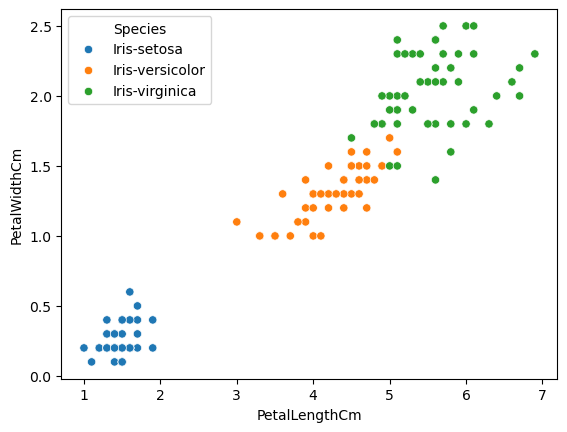

In [10]:
#EDA
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species')

### Data Preprocesssing

In [11]:
# check for missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#check for duplicates
data.duplicated().sum()

3

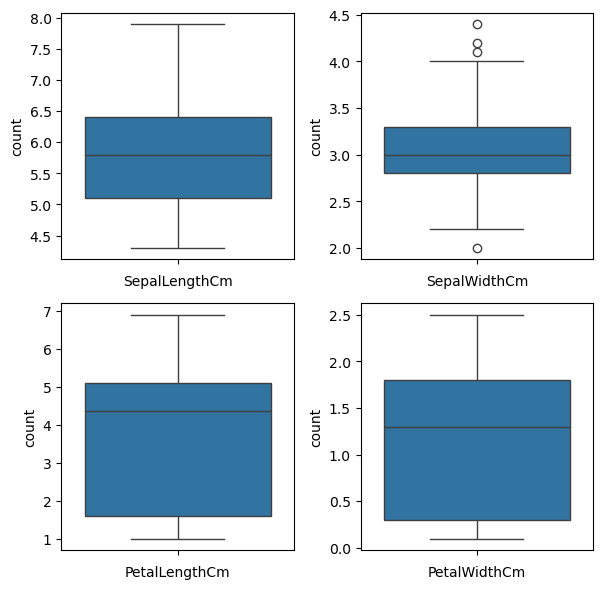

In [13]:
# check for outliers
plt.figure(figsize=(6,6))
plotnumber=1

for column in data.drop('Species',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel("count")
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

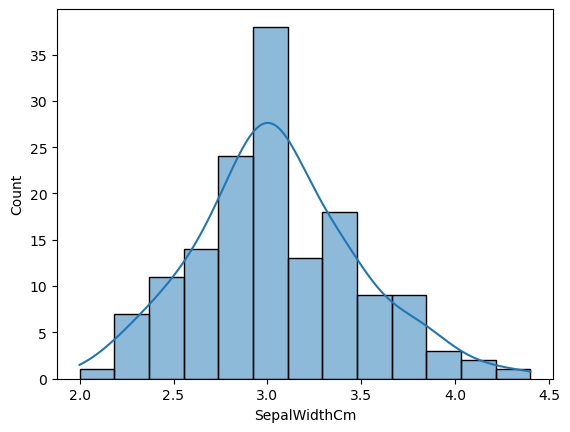

In [14]:
sns.histplot(data=data,x='SepalWidthCm',kde=True)

### Handling Outlier in sepalawidth

* clearly we see ouliers in sepalwidth column and distribution is noraml we use 3-sigma rule to identify the outliers
* Repalce Outliers with mean since data is normal.

In [15]:
# 3-sigma rule
lower_limit=data['SepalWidthCm'].mean()-3*data['SepalWidthCm'].std()
upper_limit=data['SepalWidthCm'].mean()+3*data['SepalWidthCm'].std()
print("Lower limit is",lower_limit)
print("upper limit is",upper_limit)

Lower limit is 1.7532170659134791
upper limit is 4.354782934086521


In [16]:
#find values less than lower limit
data.loc[data['SepalWidthCm']<lower_limit]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [17]:
#find values greater than upper limit
data.loc[data['SepalWidthCm']>upper_limit]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa


In [18]:
# replace oulier with mean
data.loc[data['SepalWidthCm']>upper_limit,'SepalWidthCm']=data['SepalWidthCm'].mean()

<Axes: xlabel='SepalWidthCm'>

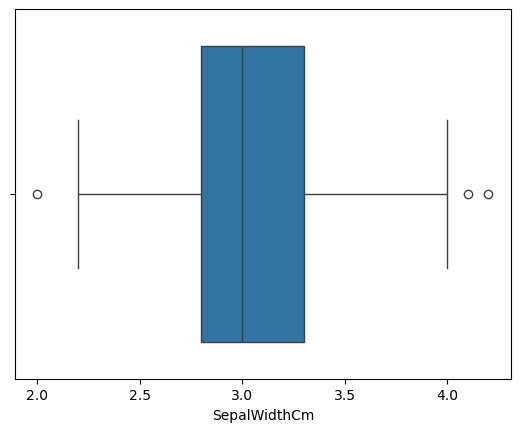

In [19]:
sns.boxplot(data=data,x='SepalWidthCm')

In [20]:
## still it showingh dots means they are not ouliers ,outliers are removed using 3sigma rule

In [21]:
# Apply scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]=scaling.fit_transform(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [22]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.088864,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.107760,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.370890,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.131565,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.328189,-1.341272,-1.312977,Iris-setosa


In [23]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-3.079019e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.501008e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.864097e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.077600e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,6.102145e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,2.764138e+00,1.786341e+00,1.710902e+00


In [24]:
#Remove target from data bcs we are using unsupervised learning
x=data.drop('Species',axis=1)

In [25]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956
146,0.553333,-1.304384,0.705893,0.922064
147,0.795669,-0.107760,0.819624,1.053537
148,0.432165,0.849539,0.933356,1.447956


### Aplly K-Means Algorithm

In [26]:
# import K-Mean model
from sklearn.cluster import KMeans
# intialize model
model=KMeans(n_clusters=6,random_state=10) #we can change the nu,ner of clusters
# train model
model.fit(x)


KMeans(n_clusters=6, random_state=10)

In [27]:
# Centroids-clusters centers
# no of clusters is same as number of centroids
model.cluster_centers_

array([[ 0.92260678,  0.24552905,  1.01730037,  1.33526453],
       [-1.29723056,  0.08304717, -1.32834838, -1.29504859],
       [ 0.37158147, -0.34708484,  0.54147688,  0.47619891],
       [-0.79249557,  1.41366221, -1.28643762, -1.22376293],
       [ 2.00734772,  0.08805124,  1.45548631,  1.06548882],
       [-0.35542575, -1.43492503,  0.13465109,  0.04956133]])

In [28]:
model.labels_

array([3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 2, 2, 2, 5, 2, 2, 2, 5, 2, 5, 5, 2, 5, 2, 2, 2,
       2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 2, 5,
       2, 5, 5, 2, 5, 5, 5, 2, 2, 2, 5, 2, 0, 2, 4, 2, 0, 4, 5, 4, 2, 0,
       0, 2, 0, 5, 2, 0, 0, 4, 4, 5, 0, 2, 4, 2, 0, 4, 2, 2, 0, 4, 4, 4,
       0, 2, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

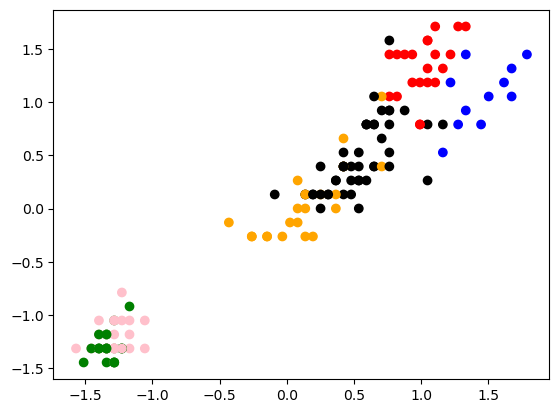

In [29]:
# Visualize the clusters created by model
color_schema=np.array(["red","green","black","pink","blue","orange"])
plt.scatter(data.PetalLengthCm,data.PetalWidthCm,color=color_schema[model.labels_])

In [30]:
data['labels']=pd.DataFrame(model.labels_)

In [31]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,-0.900681,1.088864,-1.341272,-1.312977,Iris-setosa,3
1,-1.143017,-0.107760,-1.341272,-1.312977,Iris-setosa,1
2,-1.385353,0.370890,-1.398138,-1.312977,Iris-setosa,1
3,-1.506521,0.131565,-1.284407,-1.312977,Iris-setosa,1
4,-1.021849,1.328189,-1.341272,-1.312977,Iris-setosa,3
...,...,...,...,...,...,...
145,1.038005,-0.107760,0.819624,1.447956,Iris-virginica,0
146,0.553333,-1.304384,0.705893,0.922064,Iris-virginica,2
147,0.795669,-0.107760,0.819624,1.053537,Iris-virginica,0
148,0.432165,0.849539,0.933356,1.447956,Iris-virginica,0


In [32]:
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.33594841226300776

In [33]:
# we see overlapping of clusters bcs number of clusters we have choosen might be wrong


### How to find optimal value for K?
* Elbow Method

### Choosing K using Elbow Method 

K-Means requires us to choose the number of clusters (K).
The Elbow Method helps find the best K.

###### How Elbow Method Works?
*Try different values of K (e.g., 1 to 10).

For each K, calculate WCSS
→ WCSS = Within-Cluster Sum of Squares
(How spread-out the points are inside clusters)

Plot K vs WCSS.
The point where the curve bends sharply like an elbow is the optimal K.

###### Meaning
* Too few clusters → high WCSS (bad)
* Too many clusters → low WCSS but unnecessary splitting
* Choose the K where adding more clusters does not reduce WCSS significantly

###### In simple words:

The “elbow point” is where the improvement starts slowing down.

##### Elbow Method Example

In [35]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.088864,-1.341272,-1.312977
1,-1.143017,-0.107760,-1.341272,-1.312977
2,-1.385353,0.370890,-1.398138,-1.312977
3,-1.506521,0.131565,-1.284407,-1.312977
4,-1.021849,1.328189,-1.341272,-1.312977


#### Elbow Method on iris dataset

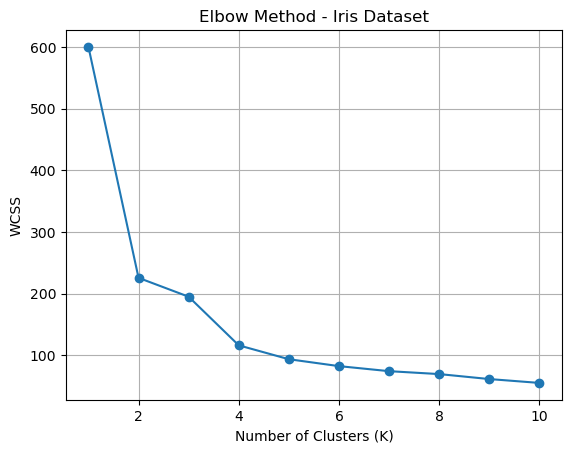

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Trying K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Iris Dataset")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [37]:
# For Iris, the “elbow” almost always appears at K = 3, matching the 3 species in the dataset.

##### Fitting K-Means with optimal K = 3

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels,Cluster
0,-0.900681,1.088864,-1.341272,-1.312977,Iris-setosa,3,2
1,-1.143017,-0.107760,-1.341272,-1.312977,Iris-setosa,1,1
2,-1.385353,0.370890,-1.398138,-1.312977,Iris-setosa,1,1
3,-1.506521,0.131565,-1.284407,-1.312977,Iris-setosa,1,1
4,-1.021849,1.328189,-1.341272,-1.312977,Iris-setosa,3,2


##### Visualizing clusters (using Petal Length & Petal Width)

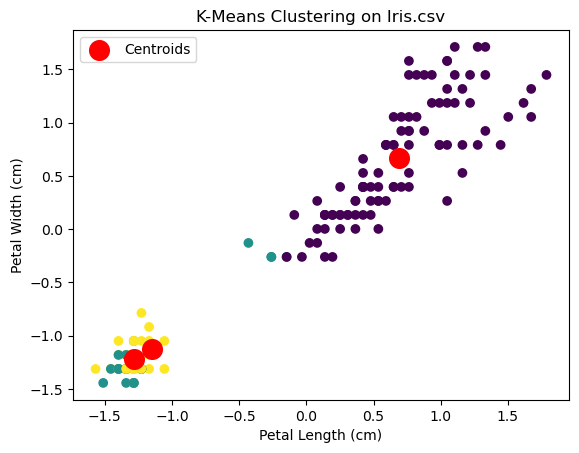

In [41]:
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], 
            c=data['Cluster'], cmap='viridis')

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], 
            s=200, c='red', label='Centroids')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering on Iris.csv")
plt.legend()
plt.show()
